### Context
This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

### Content
This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.

For further reference on individual fields see the Glossary of Terms. For the building classification codes see the Building Classifications Glossary.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.
Acknowledgements
This dataset is a concatenated and slightly cleaned-up version of the New York City Department of Finance's Rolling Sales dataset.

### Inspiration
What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market, or build a model that predicts sale value in the future?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("nyc-rolling-sales.csv", date_parser=['SALE DATE'])
df['SALE DATE']=pd.to_datetime(df['SALE DATE'])
df=df.iloc[:, 1:]
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
1        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
2        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0                   2A    392    6                                  C2   
1                    2    399   26                                  C7   
2                    2    399   39                                  C7   
3                   2B    402   21                                  C4   
4                   2A    404   55                                  C2   

                  ADDRESS APARTMENT NUMBER  ZIP CODE  RESIDENTIAL UNITS  \
0            153 AVENUE B                      10009                  5   
1   234 EAST 4TH   STREET                      10009                 28   
2   197 EAST 3RD   STREET                      10009                 16   
3     154 EAST 7TH STREET                      10009                 10   
4  301 EAST 10TH   STREET                      10009                  6   

   COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  \
0                 0            5             1633              6440   
1                 3           31             4616             18690   
2                 1           17             2212              7803   
3                 0           10             2272              6794   
4                 0            6             2369              4615   

   YEAR BUILT  TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  \
0        1900                          2                             C2   
1        1900                          2                             C7   
2        1900                          2                             C7   
3        1913                          2                             C4   
4        1900                          2                             C2   

  SALE PRICE  SALE DATE  
0    6625000 2017-07-19  
1        -   2016-12-14  
2        -   2016-12-09  
3    3936272 2016-09-23  
4    8000000 2016-11-17

In [3]:
df.shape

(84548, 21)

In [4]:
df['SALE DATE'].min(), df['SALE DATE'].max()

(Timestamp('2016-09-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [5]:
by_dates=df['SALE DATE'].value_counts().sort_values()
by_dates=pd.DataFrame(by_dates).reset_index()
by_dates.columns=['SALE DATE', 'counts']
by_dates=by_dates.sort_values('SALE DATE')
by_dates.head()

SALE DATE  counts
325 2016-09-01     395
126 2016-09-02     184
43  2016-09-03       8
7   2016-09-04       3
31  2016-09-05       6

In [6]:
by_months=df.groupby(df["SALE DATE"].dt.strftime("%B"))['SALE DATE'].count().sort_index()
by_months=pd.DataFrame(by_months)
by_months.columns=['Counts']
by_months.reset_index(inplace=True)
by_months.columns=['Months', 'Counts']
by_months

Months  Counts
0       April    6402
1      August    5681
2    December    7891
3    February    6323
4     January    6871
5        July    6319
6        June    8293
7       March    7705
8         May    7461
9    November    7072
10    October    6751
11  September    7779

In [7]:
px.bar(data_frame=by_months, x='Months', y='Counts', color='Months')

In [8]:
px.box(data_frame=df, x='BOROUGH', y='SALE PRICE', color='BOROUGH')

In [9]:
cat_features=[x for x in df.columns if(df[x].dtypes=='object')]
num_features=[x for x in df.columns if(df[x].dtypes!='object')]
print(len(num_features), len(cat_features))

10 11


In [10]:
df[cat_features].head()

NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
2  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT EASE-MENT BUILDING CLASS AT PRESENT  \
0                   2A                                  C2   
1                    2                                  C7   
2                    2                                  C7   
3                   2B                                  C4   
4                   2A                                  C2   

                  ADDRESS APARTMENT NUMBER LAND SQUARE FEET GROSS SQUARE FEET  \
0            153 AVENUE B                              1633              6440   
1   234 EAST 4TH   STREET                              4616             18690   
2   197 EAST 3RD   STREET                              2212              7803   
3     154 EAST 7TH STREET                              2272              6794   
4  301 EAST 10TH   STREET                              2369              4615   

  BUILDING CLASS AT TIME OF SALE SALE PRICE  
0                             C2    6625000  
1                             C7        -    
2                             C7        -    
3                             C4    3936272  
4                             C2    8000000

In [11]:
for i in  range(len(df['NEIGHBORHOOD'].value_counts().index)):
    
    per=np.round(df['NEIGHBORHOOD'].value_counts()[i]/len(df['NEIGHBORHOOD'])  *  100, 5)
    index=df['NEIGHBORHOOD'].value_counts().index[i]
    
    if(per < 1.):
        print("{} {}".format(index, per))

BAY RIDGE 0.98406
CHELSEA 0.94976
ELMHURST 0.94857
CROWN HEIGHTS 0.93793
CANARSIE 0.9261
GREAT KILLS 0.91782
BUSHWICK 0.90954
RICHMOND HILL 0.88589
REGO PARK 0.85277
PARK SLOPE 0.83503
GRAVESEND 0.83385
TRIBECA 0.77471
CORONA 0.76525
RIVERDALE 0.76525
GREENWICH VILLAGE-CENTRAL 0.7546
GREENWICH VILLAGE-WEST 0.74041
MURRAY HILL 0.73449
ST. ALBANS 0.73095
SUNSET PARK 0.72858
SO. JAMAICA-BAISLEY PARK 0.7203
QUEENS VILLAGE 0.70256
NEW SPRINGVILLE 0.69783
HOWARD BEACH 0.69428
OZONE PARK 0.68955
LONG ISLAND CITY 0.68364
BENSONHURST 0.68127
OCEAN PARKWAY-NORTH 0.67536
SOUTH OZONE PARK 0.64815
SPRINGFIELD GARDENS 0.64579
FLATBUSH-CENTRAL 0.63632
SOUTH JAMAICA 0.63514
BRIGHTON BEACH 0.60321
SOUNDVIEW 0.5902
FINANCIAL 0.58665
MIDDLE VILLAGE 0.58547
GRAMERCY 0.56063
FLATIRON 0.55945
WHITESTONE 0.55826
HOLLIS 0.55353
MIDWOOD 0.55353
GREENPOINT 0.54762
RIDGEWOOD 0.54289
PARKCHESTER 0.53816
WILLIAMSBURG-EAST 0.53816
COLLEGE POINT 0.53106
WOODSIDE 0.52041
WILLIAMSBRIDGE 0.52041
BAYCHESTER 0.51568
GLEN

In [12]:
def convert_into_rare_cat_feature(df, col, threshold):
    
    df[col]=df[col].mask(df[col].map(df[col].value_counts(normalize=True))<threshold, "OTHER")
    df.NEIGHBORHOOD.value_counts()
    
    return df

In [13]:
df=convert_into_rare_cat_feature(df, 'NEIGHBORHOOD', 0.01)
df.NEIGHBORHOOD.value_counts()

OTHER                      61661
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
MIDTOWN EAST                1418
BOROUGH PARK                1245
ASTORIA                     1216
BAYSIDE                     1150
FOREST HILLS                1069
SHEEPSHEAD BAY              1013
UPPER WEST SIDE (79-96)     1004
JACKSON HEIGHTS              992
EAST NEW YORK                982
FLUSHING-SOUTH               918
MIDTOWN WEST                 918
HARLEM-CENTRAL               847
FLATBUSH-EAST                846
Name: NEIGHBORHOOD, dtype: int64

In [14]:
# df['BUILDING CLASS CATEGORY'].value_counts()
for i in  range(len(df['BUILDING CLASS CATEGORY'].value_counts().index)):
    
    per=np.round(df['BUILDING CLASS CATEGORY'].value_counts()[i]/len(df['BUILDING CLASS CATEGORY'])  *  100, 5)
    index=df['BUILDING CLASS CATEGORY'].value_counts().index[i]
    
#     if(per < 1.):
    print("{} {}".format(index, per))

01 ONE FAMILY DWELLINGS                     21.56763
02 TWO FAMILY DWELLINGS                     18.72073
13 CONDOS - ELEVATOR APARTMENTS             15.36287
10 COOPS - ELEVATOR APARTMENTS              15.25997
03 THREE FAMILY DWELLINGS                   5.18522
07 RENTALS - WALKUP APARTMENTS              4.09945
09 COOPS - WALKUP APARTMENTS                3.2727
04 TAX CLASS 1 CONDOS                       1.95865
44 CONDO PARKING                            1.70436
15 CONDOS - 2-10 UNIT RESIDENTIAL           1.51512
05 TAX CLASS 1 VACANT LAND                  1.47608
17 CONDO COOPS                              1.42049
22 STORE BUILDINGS                          1.10588
12 CONDOS - WALKUP APARTMENTS               1.09524
14 RENTALS - 4-10 UNIT                      0.79363
29 COMMERCIAL GARAGES                       0.69428
43 CONDO OFFICE BUILDINGS                   0.56181
31 COMMERCIAL VACANT LAND                   0.54762
08 RENTALS - ELEVATOR APARTMENTS            0.45181
47 CONDO 

In [15]:
df=convert_into_rare_cat_feature(df, 'BUILDING CLASS CATEGORY', 0.02)
df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                        18235
02 TWO FAMILY DWELLINGS                        15828
OTHER                                          13977
13 CONDOS - ELEVATOR APARTMENTS                12989
10 COOPS - ELEVATOR APARTMENTS                 12902
03 THREE FAMILY DWELLINGS                       4384
07 RENTALS - WALKUP APARTMENTS                  3466
09 COOPS - WALKUP APARTMENTS                    2767
Name: BUILDING CLASS CATEGORY, dtype: int64

In [16]:
df['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [17]:
# df['BUILDING CLASS CATEGORY'].value_counts()
for i in  range(len(df['TAX CLASS AT PRESENT'].value_counts().index)):
    
    per=np.round(df['TAX CLASS AT PRESENT'].value_counts()[i]/len(df['TAX CLASS AT PRESENT'])  *  100, 5)
    index=df['TAX CLASS AT PRESENT'].value_counts().index[i]
    
#     if(per < 1.):
    print("{} {}".format(index, per))

1 45.69357
2 36.56976
4 7.26215
2A 2.98174
2C 2.26499
1A 1.70791
1B 1.45953
2B 0.96277
  0.87288
1C 0.21999
3 0.00473


In [18]:
df['TAX CLASS AT PRESENT'].value_counts(normalize=True)

1     0.456936
2     0.365698
4     0.072621
2A    0.029817
2C    0.022650
1A    0.017079
1B    0.014595
2B    0.009628
      0.008729
1C    0.002200
3     0.000047
Name: TAX CLASS AT PRESENT, dtype: float64

In [19]:
df=convert_into_rare_cat_feature(df, 'TAX CLASS AT PRESENT', 0.3)
df['TAX CLASS AT PRESENT'].value_counts()

1        38633
2        30919
OTHER    14996
Name: TAX CLASS AT PRESENT, dtype: int64

In [20]:
df['BUILDING CLASS AT PRESENT'].value_counts(normalize=True)

D4    0.149773
R4    0.147632
A1    0.079872
A5    0.067216
B2    0.058227
B1    0.056169
C0    0.051793
B3    0.045229
A2    0.033366
C6    0.032644
B9    0.018250
R3    0.017079
A9    0.016570
R1    0.014524
V0    0.014453
R9    0.014205
C3    0.012975
RG    0.012407
R2    0.010952
C1    0.010018
C2    0.009651
S2    0.009438
      0.008729
RB    0.005571
A0    0.005547
V1    0.005382
A3    0.004601
K1    0.004270
S1    0.004175
RS    0.004140
C7    0.004033
K4    0.003927
RP    0.003454
G7    0.003028
D0    0.002791
A4    0.002779
S9    0.002685
E1    0.002614
RH    0.002496
R6    0.002188
S3    0.002153
C4    0.002129
K2    0.002058
D1    0.002034
G0    0.002011
C5    0.001975
RK    0.001845
Z9    0.001774
S4    0.001680
S5    0.001431
G2    0.001242
G1    0.001195
R8    0.001183
A6    0.001100
H3    0.001005
F5    0.000994
O2    0.000982
O5    0.000958
E9    0.000887
O7    0.000792
D7    0.000781
M1    0.000733
D3    0.000674
F4    0.000651
RT    0.000556
O6    0.000485
RR    0.00

In [21]:
df=convert_into_rare_cat_feature(df, 'BUILDING CLASS AT PRESENT', 0.05)
df['BUILDING CLASS AT PRESENT'].value_counts()

OTHER    32916
D4       12663
R4       12482
A1        6753
A5        5683
B2        4923
B1        4749
C0        4379
Name: BUILDING CLASS AT PRESENT, dtype: int64

In [22]:
df[cat_features].head(3)

NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        OTHER  07 RENTALS - WALKUP APARTMENTS                
1        OTHER  07 RENTALS - WALKUP APARTMENTS                
2        OTHER  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT EASE-MENT BUILDING CLASS AT PRESENT  \
0                OTHER                               OTHER   
1                    2                               OTHER   
2                    2                               OTHER   

                 ADDRESS APARTMENT NUMBER LAND SQUARE FEET GROSS SQUARE FEET  \
0           153 AVENUE B                              1633              6440   
1  234 EAST 4TH   STREET                              4616             18690   
2  197 EAST 3RD   STREET                              2212              7803   

  BUILDING CLASS AT TIME OF SALE SALE PRICE  
0                             C2    6625000  
1                             C7        -    
2                             C7        -

In [23]:
print(len(df['ADDRESS'].unique()))
df.drop('ADDRESS', inplace=True, axis=1)
cat_features.remove("ADDRESS")
df.shape

67563


(84548, 20)

In [24]:
df['BUILDING CLASS AT TIME OF SALE'].value_counts(normalize=True)

R4    0.153629
D4    0.149808
A1    0.079848
A5    0.067074
B2    0.058168
B1    0.056146
C0    0.051852
B3    0.045193
A2    0.033910
C6    0.032644
B9    0.018250
R3    0.017162
A9    0.016724
R1    0.015151
V0    0.014619
R9    0.014205
RG    0.013247
C3    0.012999
R2    0.010952
C1    0.010030
C2    0.009651
S2    0.009450
RB    0.005618
V1    0.005346
A0    0.005074
A3    0.004589
RS    0.004459
K1    0.004234
S1    0.004187
C7    0.004021
K4    0.003939
RP    0.003797
G7    0.003004
D0    0.002791
A4    0.002768
S9    0.002685
E1    0.002614
RH    0.002496
R6    0.002413
S3    0.002153
C4    0.002117
K2    0.002046
D1    0.002023
C5    0.001987
G0    0.001963
RK    0.001821
Z9    0.001786
S4    0.001668
S5    0.001431
G2    0.001230
G1    0.001218
R8    0.001135
A6    0.001088
H3    0.001005
O2    0.000994
F5    0.000994
O5    0.000970
E9    0.000887
O7    0.000792
D7    0.000781
M1    0.000745
F4    0.000686
D3    0.000639
RT    0.000556
RR    0.000509
O6    0.000485
G9    0.00

In [25]:
df=convert_into_rare_cat_feature(df, 'BUILDING CLASS AT TIME OF SALE', 0.05)
df['BUILDING CLASS AT TIME OF SALE'].value_counts()

OTHER    32422
R4       12989
D4       12666
A1        6751
A5        5671
B2        4918
B1        4747
C0        4384
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

In [26]:
df[cat_features].head(2)

NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        OTHER  07 RENTALS - WALKUP APARTMENTS                
1        OTHER  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT EASE-MENT BUILDING CLASS AT PRESENT APARTMENT NUMBER  \
0                OTHER                               OTHER                    
1                    2                               OTHER                    

  LAND SQUARE FEET GROSS SQUARE FEET BUILDING CLASS AT TIME OF SALE SALE PRICE  
0             1633              6440                          OTHER    6625000  
1             4616             18690                          OTHER        -

In [27]:
df.drop('EASE-MENT', axis=1, inplace=True)
cat_features.remove('EASE-MENT')
df[cat_features].head(2)

NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        OTHER  07 RENTALS - WALKUP APARTMENTS                
1        OTHER  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT APARTMENT NUMBER  \
0                OTHER                     OTHER                    
1                    2                     OTHER                    

  LAND SQUARE FEET GROSS SQUARE FEET BUILDING CLASS AT TIME OF SALE SALE PRICE  
0             1633              6440                          OTHER    6625000  
1             4616             18690                          OTHER        -

In [28]:
df.drop('APARTMENT NUMBER', inplace=True, axis=1)
df.head(2)

BOROUGH NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        1        OTHER  07 RENTALS - WALKUP APARTMENTS                
1        1        OTHER  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRESENT  ZIP CODE  \
0                OTHER    392    6                     OTHER     10009   
1                    2    399   26                     OTHER     10009   

   RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET  \
0                  5                 0            5             1633   
1                 28                 3           31             4616   

  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0              6440        1900                          2   
1             18690        1900                          2   

  BUILDING CLASS AT TIME OF SALE SALE PRICE  SALE DATE  
0                          OTHER    6625000 2017-07-19  
1                          OTHER        -   2016-12-14

In [29]:
#Let's convert some of the columns to appropriate datatype

df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('int')

In [30]:
# For time being, let's fill these up with mean values.
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [31]:
df.dtypes

BOROUGH                                    int32
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                    category
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE               category
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

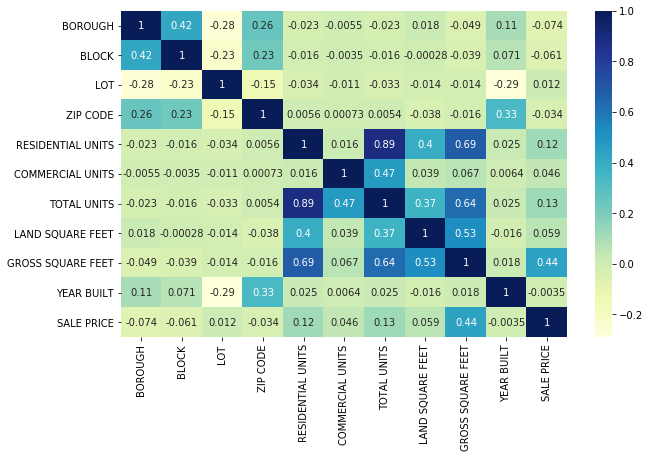

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

## Data Visualisation 

### Exploratory Data Analysis

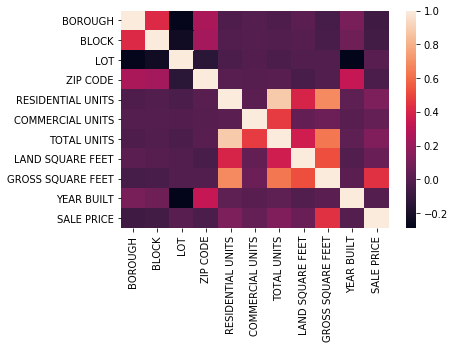

In [33]:
#correlation between the features
corr = df.corr()
sns.heatmap(corr)

In [34]:
#numeric correlation
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.444508
TOTAL UNITS          0.125101
RESIDENTIAL UNITS    0.119698
LAND SQUARE FEET     0.059079
COMMERCIAL UNITS     0.046006
LOT                  0.012324
YEAR BUILT          -0.003539
ZIP CODE            -0.034170
BLOCK               -0.061139
BOROUGH             -0.074418
Name: SALE PRICE, dtype: float64

In [35]:
df.describe(include=[np.number])

BOROUGH         BLOCK           LOT      ZIP CODE  \
count  84548.000000  84548.000000  84548.000000  84548.000000   
mean       2.998758   4237.218976    376.224015  10731.991614   
std        1.289790   3568.263407    658.136814   1290.879147   
min        1.000000      1.000000      1.000000      0.000000   
25%        2.000000   1322.750000     22.000000  10305.000000   
50%        3.000000   3311.000000     50.000000  11209.000000   
75%        4.000000   6281.000000   1001.000000  11357.000000   
max        5.000000  16322.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  \
count       84548.000000      84548.000000  84548.000000      8.454800e+04   
mean            2.025264          0.193559      2.249184      3.941676e+03   
std            16.721037          8.713183     18.972584      3.486182e+04   
min             0.000000          0.000000      0.000000      0.000000e+00   
25%             0.000000          0.000000      1.000000      2.000000e+03   
50%             1.000000          0.000000      1.000000      3.200000e+03   
75%             2.000000          0.000000      2.000000      3.941676e+03   
max          1844.000000       2261.000000   2261.000000      4.252327e+06   

       GROSS SQUARE FEET    YEAR BUILT    SALE PRICE  
count       8.454800e+04  84548.000000  6.998700e+04  
mean        4.045707e+03   1789.322976  1.276456e+06  
std         2.874826e+04    537.344993  1.140526e+07  
min         0.000000e+00      0.000000  0.000000e+00  
25%         1.348000e+03   1920.000000  2.250000e+05  
50%         2.520000e+03   1940.000000  5.300000e+05  
75%         4.045707e+03   1965.000000  9.500000e+05  
max         3.750565e+06   2017.000000  2.210000e+09

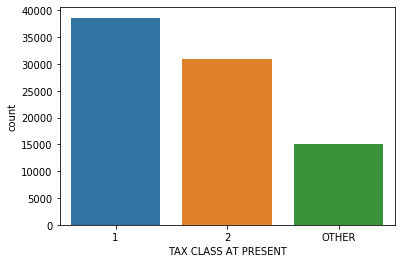

In [36]:
sns.countplot(
    x="TAX CLASS AT PRESENT",
    data = df,
    order = df["TAX CLASS AT PRESENT"].value_counts().index,
)
plt.show()

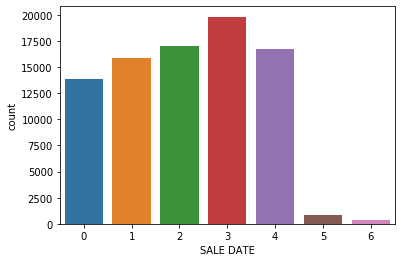

In [37]:
sns.countplot(df["SALE DATE"].dt.dayofweek)

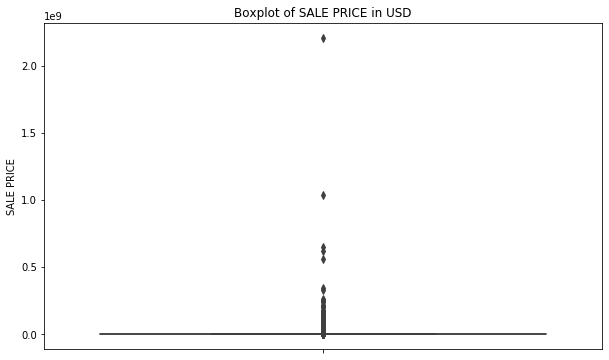

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='SALE PRICE')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

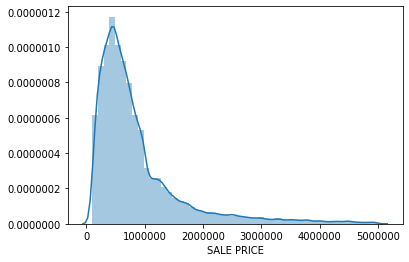

In [39]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]
sns.distplot(df['SALE PRICE'])

In [40]:
#skewness of SalePrice
df['SALE PRICE'].skew()

2.3446374221747437

SALE PRICE is highly right skewed. So, we will log transform it so that it give better results.

0.1989281802313763


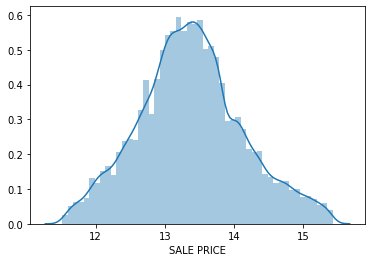

In [41]:
sales=np.log(df['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

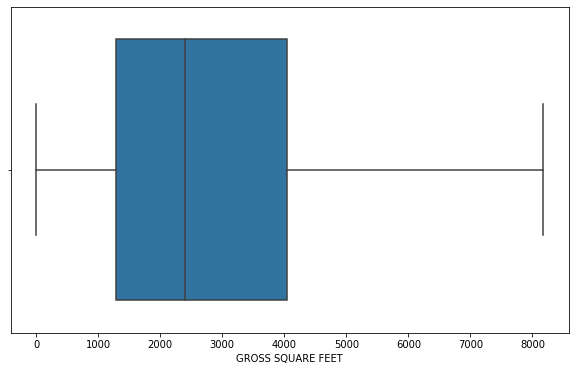

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df, showfliers=False)

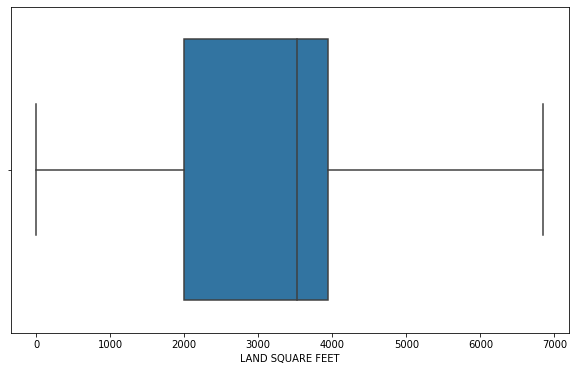

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=df, showfliers=False)

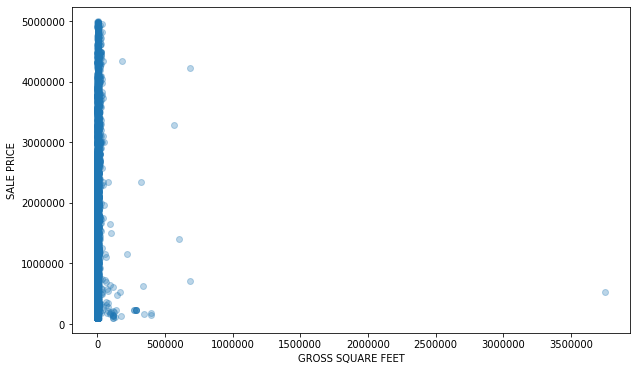

In [44]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})

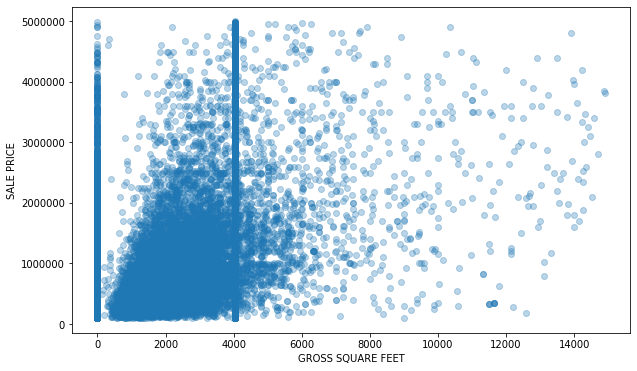

In [45]:
df=df[df['GROSS SQUARE FEET']<15000]
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})

In [46]:
df.shape

(54480, 18)

In [47]:
df.groupby(['TOTAL UNITS'], as_index=False)["SALE PRICE"].count().sort_values("SALE PRICE", ascending=False)

TOTAL UNITS  SALE PRICE
1             1       24905
0             0       15559
2             2        9586
3             3        2735
4             4         705
6             6         367
5             5         178
8             8         136
7             7          75
10           10          58
9             9          57
16           16          28
12           12          20
11           11          14
15           15          13
20           20           9
14           14           9
18           18           6
13           13           5
17           17           3
21           21           3
19           19           2
24           27           2
22           23           1
23           24           1
25           36           1
26           48           1
27         2261           1

In [48]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)] 

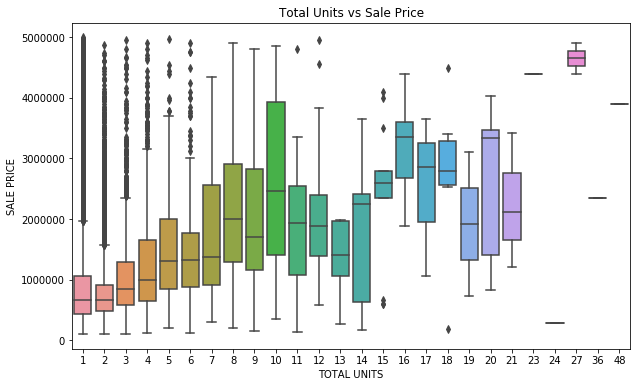

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=df)
plt.title('Total Units vs Sale Price')
plt.show()

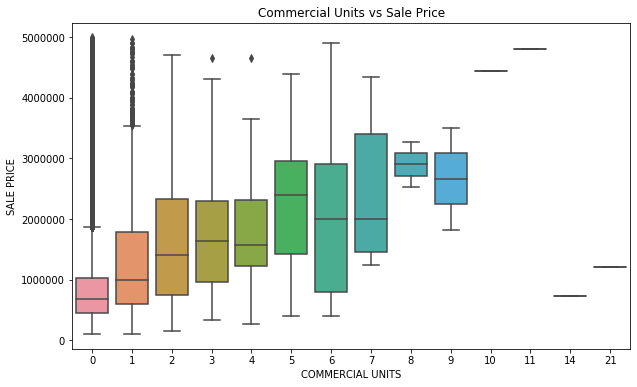

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Commercial Units vs Sale Price')
plt.show()

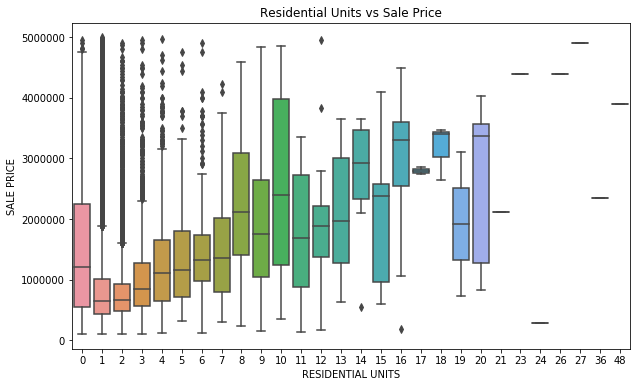

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('Residential Units vs Sale Price')
plt.show()

In [52]:
cat_data=df.select_dtypes(exclude=[np.number])
cat_data.describe()

NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
count         38920                                        38920   
unique           19                                            8   
top           OTHER  01 ONE FAMILY DWELLINGS                       
freq          30339                                        12446   
first           NaN                                          NaN   
last            NaN                                          NaN   

       TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT  \
count                 38920                     38920   
unique                    3                         8   
top                       1                     OTHER   
freq                  24296                     13212   
first                   NaN                       NaN   
last                    NaN                       NaN   

        TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  \
count                     38920.0                          38920   
unique                        3.0                              8   
top                           1.0                          OTHER   
freq                      25528.0                          13234   
first                         NaN                            NaN   
last                          NaN                            NaN   

                  SALE DATE  
count                 38920  
unique                  324  
top     2016-12-22 00:00:00  
freq                    260  
first   2016-09-01 00:00:00  
last    2017-08-31 00:00:00

In [53]:
pivot=df.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
pivot

SALE PRICE
TAX CLASS AT PRESENT            
1                       599000.0
2                       982611.0
OTHER                   844564.5

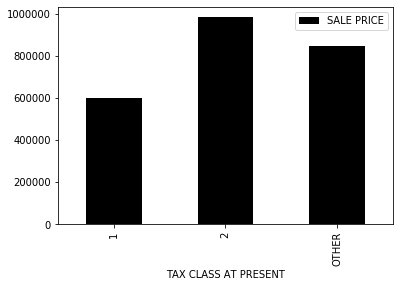

In [54]:
pivot.plot(kind='bar', color='black')

In [55]:
pivot=df.pivot_table(index='TAX CLASS AT TIME OF SALE', values='SALE PRICE', aggfunc=np.median)
pivot

SALE PRICE
TAX CLASS AT TIME OF SALE            
1                            585392.0
2                            995000.0
4                           1150000.0

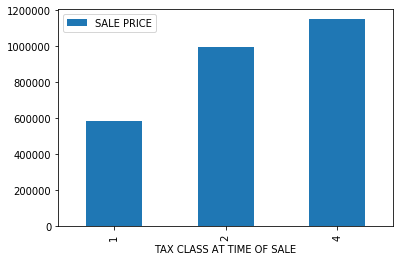

In [56]:
pivot.plot(kind='bar')

In [57]:
pivot=df.pivot_table(index='BOROUGH', values='SALE PRICE', aggfunc=np.median)
pivot

SALE PRICE
BOROUGH            
1         1435000.0
2          458142.0
3          865000.0
4          638685.0
5          475000.0

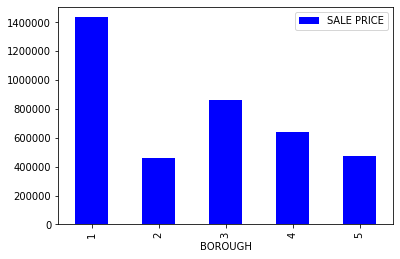

In [58]:
pivot.plot(kind='bar', color='blue')

In [59]:
# BUILDING CLASS CATEGORY
print(df['BUILDING CLASS CATEGORY'].nunique())

pivot=df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot

8


SALE PRICE
BUILDING CLASS CATEGORY                                
01 ONE FAMILY DWELLINGS                        515000.0
02 TWO FAMILY DWELLINGS                        665000.0
03 THREE FAMILY DWELLINGS                      817833.0
07 RENTALS - WALKUP APARTMENTS                1300000.0
09 COOPS - WALKUP APARTMENTS                   282000.0
10 COOPS - ELEVATOR APARTMENTS                 550000.0
13 CONDOS - ELEVATOR APARTMENTS                999999.0
OTHER                                          687159.0

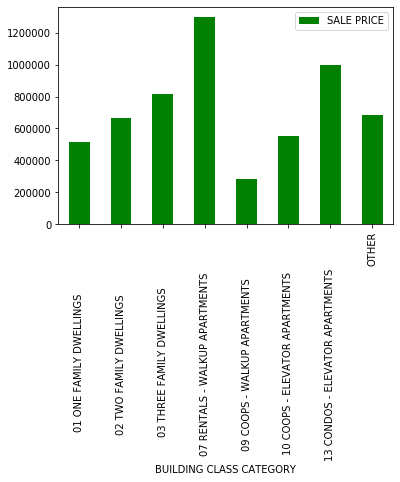

In [60]:
pivot.plot(kind='bar', color='Green')

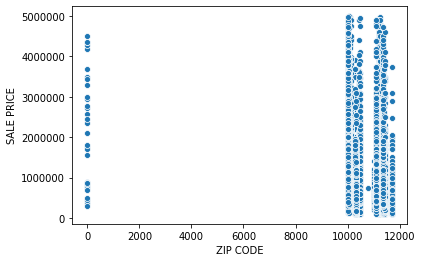

In [61]:
sns.scatterplot(x='ZIP CODE', y='SALE PRICE', data=df)

In [62]:
df.shape

(38920, 18)

In [63]:
df=df[df['ZIP CODE']!=0]
df.shape

(38886, 18)

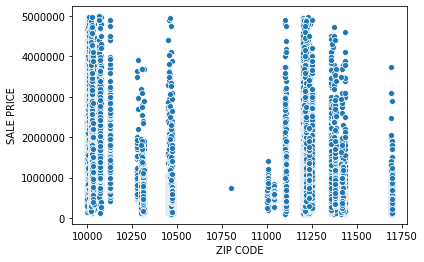

In [64]:
sns.scatterplot(x='ZIP CODE', y='SALE PRICE', data=df)

### Data Preprocessing

In [65]:
df.drop("SALE DATE", inplace=True, axis=1)
df.reset_index(inplace=True)

In [66]:
cat_features=[x for x in df.columns if(df[x].dtypes=='O')]
cat_features

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'BUILDING CLASS AT PRESENT',
 'BUILDING CLASS AT TIME OF SALE']

In [67]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
le=LabelEncoder()
le

LabelEncoder()

In [68]:
for feature in cat_features:
    
    df[feature]=le.fit_transform(df[feature])
    
df[cat_features].head(3)

NEIGHBORHOOD  BUILDING CLASS CATEGORY  BUILDING CLASS AT PRESENT  \
0            13                        3                          6   
1            13                        3                          6   
2            13                        7                          6   

   BUILDING CLASS AT TIME OF SALE  
0                               6  
1                               6  
2                               6

In [69]:
df['TAX CLASS AT PRESENT']=le.fit_transform(df['TAX CLASS AT PRESENT'])

In [70]:
data=pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
data.head()

index   BOROUGH  NEIGHBORHOOD  BUILDING CLASS CATEGORY  \
0 -1.932638 -1.837545      0.374372                 0.133653   
1 -1.932513 -1.837545      0.374372                 0.133653   
2 -1.929598 -1.837545      0.374372                 1.578837   
3 -1.929473 -1.837545      0.374372                 1.217541   
4 -1.929431 -1.837545      0.374372                 1.217541   

   TAX CLASS AT PRESENT     BLOCK       LOT  BUILDING CLASS AT PRESENT  \
0              2.111670 -1.148904 -0.622050                   0.644384   
1              2.111670 -1.147832 -0.606588                   0.644384   
2              0.701956 -1.153189  0.756845                   0.644384   
3              0.701956 -1.156671  0.758251                   1.036496   
4              0.701956 -1.156671  0.759657                   1.036496   

   ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0 -1.693579           6.544620         -0.174639     6.237909   
1 -1.693579           4.998070         -0.174639     4.750464   
2 -1.693579          -0.414855         -0.174639    -0.455594   
3 -1.693579          -0.414855         -0.174639    -0.455594   
4 -1.693579          -0.414855         -0.174639    -0.455594   

   LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0         -0.324477           2.864065    0.174704                   0.897842   
1         -0.583855           1.225825    0.189401                   0.897842   
2          0.505174           1.110809   -3.841837                   0.897842   
3          0.505174           1.110809    0.189401                   0.897842   
4          0.505174           1.110809    0.189401                   0.897842   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE  
0                        0.643347    3.889259  
1                        0.643347    2.928532  
2                        0.643347   -0.396314  
3                        1.035570   -0.211945  
4                        1.035570   -0.198787

In [71]:
X=data.iloc[:, 1:-1]
y=data.iloc[:, -1]

In [72]:
X.head(2)

BOROUGH  NEIGHBORHOOD  BUILDING CLASS CATEGORY  TAX CLASS AT PRESENT  \
0 -1.837545      0.374372                 0.133653               2.11167   
1 -1.837545      0.374372                 0.133653               2.11167   

      BLOCK       LOT  BUILDING CLASS AT PRESENT  ZIP CODE  RESIDENTIAL UNITS  \
0 -1.148904 -0.622050                   0.644384 -1.693579            6.54462   
1 -1.147832 -0.606588                   0.644384 -1.693579            4.99807   

   COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0         -0.174639     6.237909         -0.324477           2.864065   
1         -0.174639     4.750464         -0.583855           1.225825   

   YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  
0    0.174704                   0.897842                        0.643347  
1    0.189401                   0.897842                        0.643347

In [73]:
y.head(5)

0    3.889259
1    2.928532
2   -0.396314
3   -0.211945
4   -0.198787
Name: SALE PRICE, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.1, random_state=100)

In [75]:
print(X_train.shape, X_test.shape)

(34997, 16) (3889, 16)


## Data Modeling

In [76]:
# RMSE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [77]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [78]:
xgb.fit(X_train, y_train)
Y_pred_lin = xgb.predict(X_test)
rmse(y_test,Y_pred_lin)

[16:47:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6957416762995933

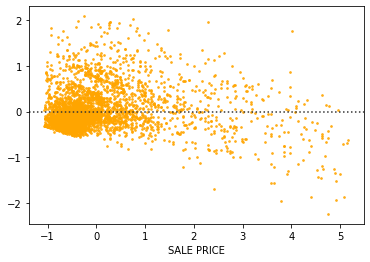

In [79]:
sns.residplot(y_test, Y_pred_lin, color="orange", scatter_kws={"s": 3})

In [80]:
param_grid = { 
    'n_estimators': [200, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 10, 12, 16, 18, 20],
    'criterion' :['gini', 'entropy']
}

In [81]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=100)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [82]:
model.fit(X_train, y_train)
model.fit(X_train, y_train)
Y_pred_lin = model.predict(X_test)
rmse(y_test,Y_pred_lin)

0.5855048200930398

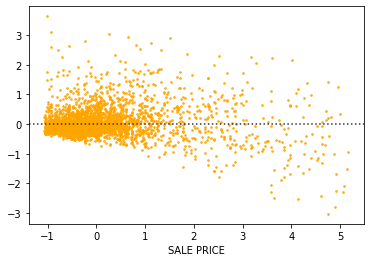

In [83]:
sns.residplot(y_test, Y_pred_lin, color="orange", scatter_kws={"s": 3})

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [85]:
model=KNeighborsRegressor()
model.fit(X_train, y_train)
model.fit(X_train, y_train)
Y_pred_lin = model.predict(X_test)
rmse(y_test,Y_pred_lin)

0.659036121105231

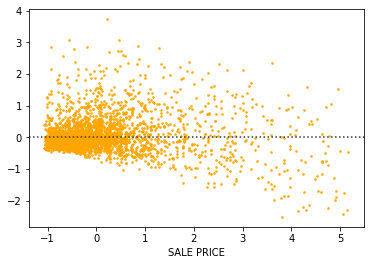

In [86]:
sns.residplot(y_test, Y_pred_lin, color="orange", scatter_kws={"s": 3})

In [87]:
model=DecisionTreeRegressor()
model.fit(X_train, y_train)
model.fit(X_train, y_train)
Y_pred_lin = model.predict(X_test)
rmse(y_test,Y_pred_lin)

0.7334529881558132

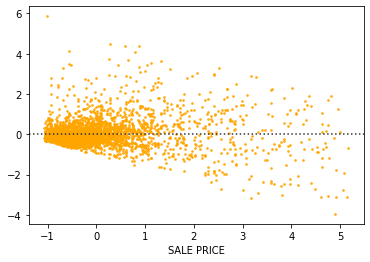

In [88]:
sns.residplot(y_test, Y_pred_lin, color="orange", scatter_kws={"s": 3})

In [89]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)
Y_pred_lin = linreg.predict(X_test)
rmse(y_test,Y_pred_lin)

0.855577634309837

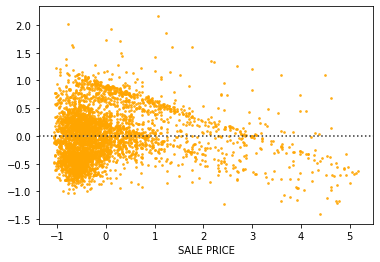

In [91]:
sns.residplot(y_test, Y_pred_lin, color="orange", scatter_kws={"s": 3})

From the given Models: RandomForest Regressor has lowest MSE Error so this is the resultant model